<a href="https://colab.research.google.com/github/MasaakiAtake/end-of-term-examination/blob/master/%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# 데이터를 준비한다. 
iris = load_iris()#scikit-learn
# 설명변수, 목적변수를 각각 DataFrame
x_df = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y_df = pd.DataFrame(iris.target, columns=["TARGET"])
df = pd.concat([x_df, y_df], axis=1)#결합

x, y = df.drop(["TARGET"], axis=1).to_numpy(), df["TARGET"].to_numpy()#DataFrame에서 Nump
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)#분할

In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(f'x_train : \n{x_train[:4]}')
print(f'x_test : \n{x_test[:4]}')
print(f'y_train : \n{y_train[:4]}')
print(f'x_test : \n{y_test[:4]}')

x_train : 
[[5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]]
x_test : 
[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]]
y_train : 
[1 2 2 2]
x_test : 
[2 1 0 2]


scikit-learn로 예측결과 : /n[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2 1 1 2 0 2 0 0]
목적 변수의 데스트 데이터 : /n[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
식별율 : /n0.9111111111111111


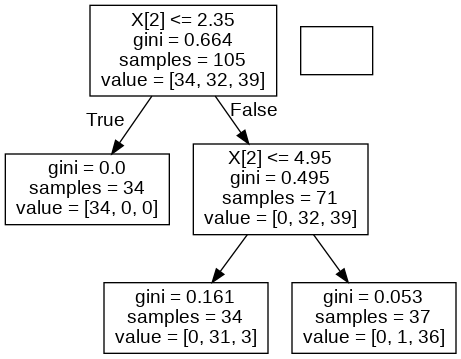

In [ ]:
# 의사결정 나무 작성
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth=2)#인스턴스화
tree_clf.fit(x_train, y_train)#학습 데이터로 학습 시킨다. 
tree_predict = tree_clf.predict(x_test)#데스트 데이터로 예측한다. 

# 결과를 출력
print(f'scikit-learn로 예측결과 : /n{tree_predict}')
print(f'목적 변수의 데스트 데이터 : /n{y_test}')
print(f'식별율 : /n{sum(tree_predict == y_test) / len(y_test)}')

# 트리 모델의 그레프를 가시화
tree.export_graphviz(tree_clf, out_file="tree.dot",
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True)

import pydotplus
from six import StringIO
dot_data = StringIO()

tree.export_graphviz(tree_clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
from IPython.display import Image
Image(graph.create_png())


scikit-learn로 예측결과 : /n[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
목적 변수의 데스트 데이터 : /n[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
식별율 : /n0.9777777777777777


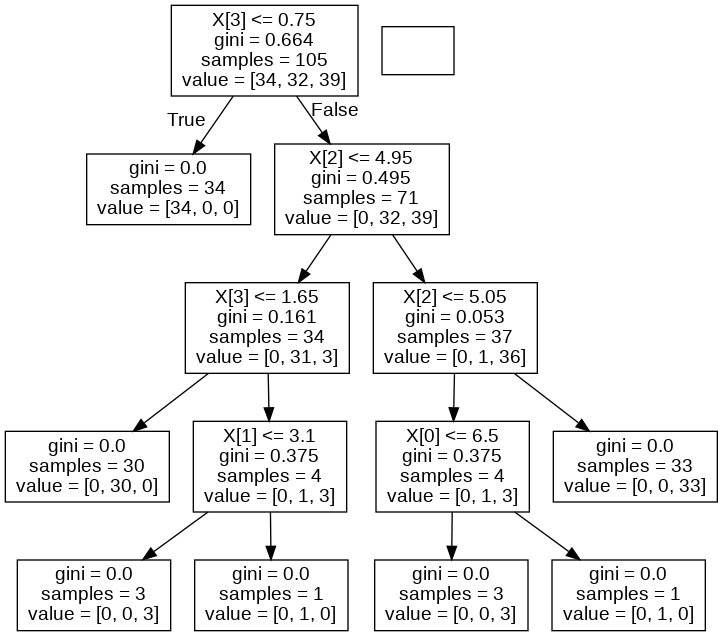

In [ ]:
# 의사결정 나무 작성
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth=4)#인스턴스화
tree_clf.fit(x_train, y_train)#학습 데이터로 학습 시킨다. 
tree_predict = tree_clf.predict(x_test)#데스트 데이터로 예측한다.

# 결과를 출력
print(f'scikit-learn로 예측결과 : /n{tree_predict}')
print(f'목적 변수의 데스트 데이터 : /n{y_test}')
print(f'식별율 : /n{sum(tree_predict == y_test) / len(y_test)}')

# 트리 모델의 그레프를 가시화
tree.export_graphviz(tree_clf, out_file="tree.dot",
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True)
import pydotplus
from six import StringIO
dot_data = StringIO()
tree.export_graphviz(tree_clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
from IPython.display import Image
Image(graph.create_png())